In [2]:
%load_ext autoreload
%autoreload 2
import os, sys
import pathlib
import json
import numpy as np
import pandas as pd

grf_sample = os.path.join(pathlib.Path.home(),os.getcwd(),"../dataset/pandas/AB06_10_09_18_GRF.pkl")
imu_sample = os.path.join(pathlib.Path.home(),os.getcwd(),"../dataset/pandas/AB06_10_09_18_IMU.pkl")
# imu_sample = os.path.join(pathlib.Path.home(),os.getcwd(),"../AB06_10_09_18_IMU.pkl")
# grf_sample = os.path.join(pathlib.Path.home(),os.getcwd(),"../AB06_10_09_18_GRF.pkl")
# combined_sample = os.path.join(pathlib.Path.home(),os.getcwd(),"../AB06_10_09_18.pkl")

In [3]:
imu_data = pd.read_pickle(imu_sample)
grf_data = pd.read_pickle(grf_sample)
# columns = imu_data.columns.tolist() + grf_data.columns.tolist()
# assert set(columns) == set(combined_data.columns.tolist())
# for i in range(0, len(columns), 10):
#     print(columns[i:i+10])
# print("combined_data.shape", combined_data.shape)
# colms = combined_data.columns.tolist()
# for i in range(0, len(colms), 10):
#     print(colms[i:i+10])

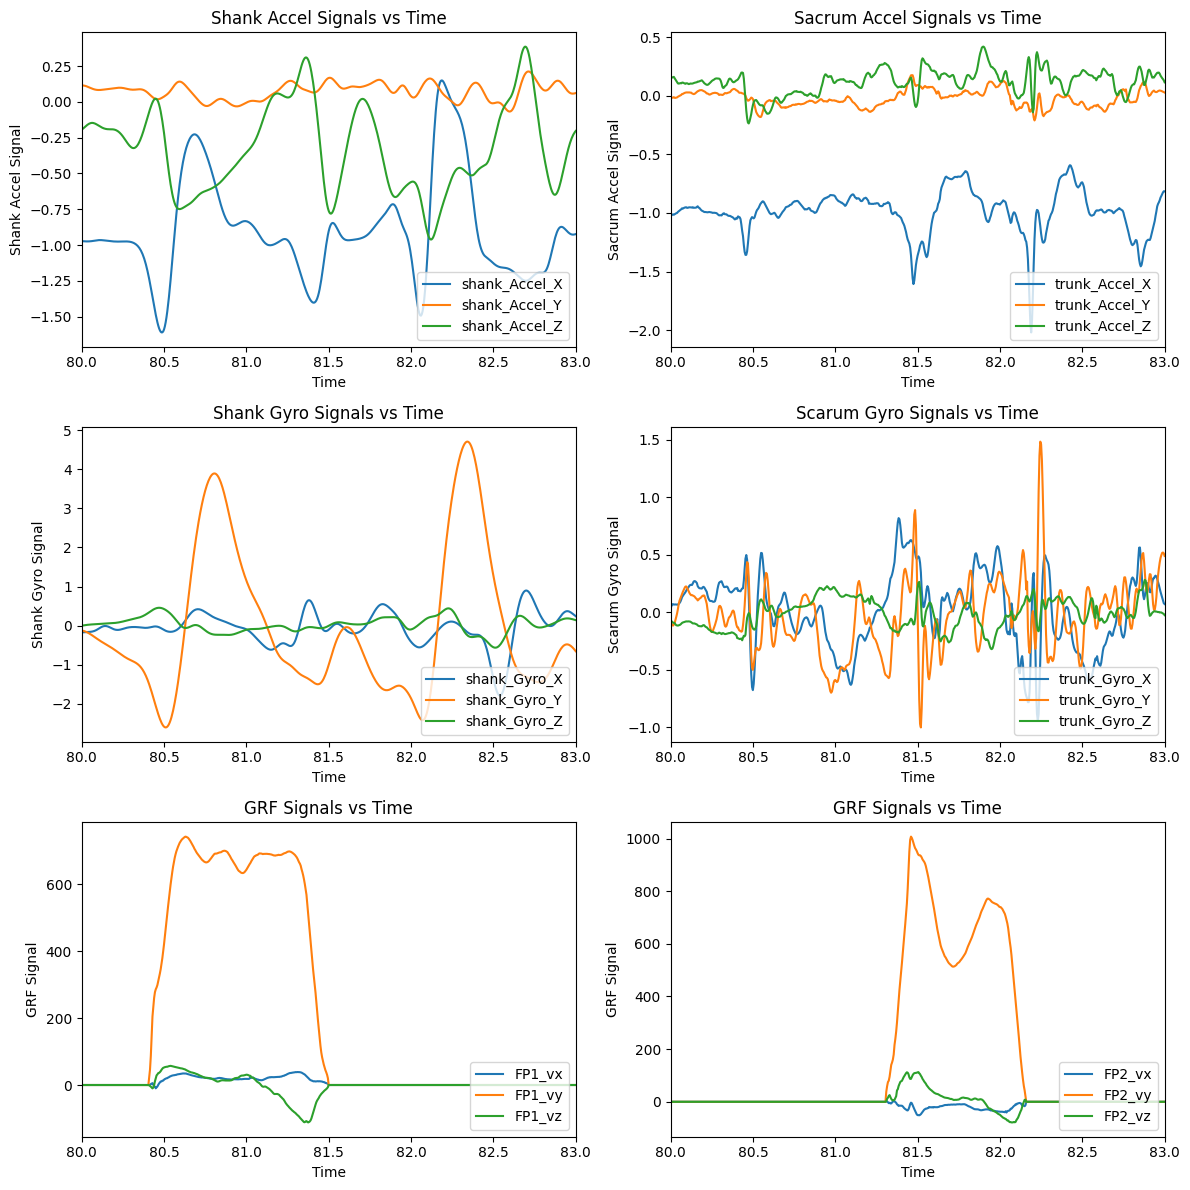

In [4]:
import itertools
import re
import matplotlib.pyplot as plt

def plot_filtered_signals(ax, data, start_time=None, end_time=None, locomotion:str=None, include_columns:list=['shank_.*'], ignore_columns:list=['.*session'], title_prefix:str=None):
    """
    Plots filtered signals from the given data between start_time and end_time.
    
    Parameters:
    - data: pandas DataFrame containing the signals.
    - start_time: float, start time for filtering the data.
    - end_time: float, end time for filtering the data.
    - locomotion: list, locomotion modes to filter the data.
    - include_columns: list, patterns of columns to include in the plot.
    - ignore_columns: list, patterns of columns to ignore in the plot.
    - title_prefix: str, prefix for the plot titles.
    """
    # Filter the data to show time between start_time and end_time
    data_filtered = data
    if start_time:
        data_filtered = data_filtered[data_filtered.index >= start_time]
    if end_time:
        data_filtered = data_filtered[data_filtered.index <= end_time]
    if locomotion:
        data_filtered = data_filtered[data_filtered['locomotion_mode'] == locomotion]
    
    # consider the first session only
    session_columns = data_filtered.columns[data_filtered.columns.str.contains('session')]
    unique_sessions = {session_column: [x for x in data_filtered[session_column].unique() if isinstance(x,str)] for session_column in session_columns}
    session_to_keep = {session_column: unique_sessions[session_column][0] for session_column in unique_sessions}
    data_filtered = data_filtered[
        (data_filtered['session'] == session_to_keep['session']) | 
        ('gcLeft_session' in data_filtered.columns and data_filtered['gcLeft_session'] == session_to_keep['session']) | 
        ('gcRight_session' in data_filtered.columns and data_filtered['gcRight_session'] == session_to_keep['session'])
    ]

    columns_to_plot = []
    for pattern in include_columns:
        columns_to_plot.extend([col for col in data_filtered.columns if re.match(pattern, col)])
    
    # Remove columns that match ignore patterns
    for pattern in ignore_columns:
        columns_to_plot = [col for col in columns_to_plot if not re.match(pattern, col)]

    start_time, end_time = min(data_filtered.index), max(data_filtered.index)

    # Plot filtered signals vs time
    for column in columns_to_plot:
        ax.plot(data_filtered[column], label=column)
        ax.set_title(f'{title_prefix} Signals vs Time')
        ax.set_xlabel('Time')
        ax.set_ylabel(f'{title_prefix} Signal')
        ax.set_xlim([start_time, end_time])
    # Move legend to the right, outside the plot
    ax.legend(loc='lower right')


# Plot filtered GRF signals
# plot_filtered_signals(imu_data, 99, 100, locomotion='treadmill', sensor_columns=sensor_columns, title_prefix='Filtered GRF')
fig, ax = plt.subplots(3, 2, figsize=(12, 12))
# Plot filtered IMU signals
plot_filtered_signals(ax[0,0],imu_data, 80,83, locomotion='stair', include_columns=['shank_Accel_.*'],title_prefix='Shank Accel')#,'thigh_Accel_.*','foot_Accel_.*'])
plot_filtered_signals(ax[0,1],imu_data, 80,83, locomotion='stair', include_columns=['trunk_Accel_.*'],title_prefix='Sacrum Accel')#,'thigh_Gyro_.*','foot_Gyro_.*'])
plot_filtered_signals(ax[1,0],imu_data, 80,83, locomotion='stair', include_columns=['shank_Gyro_.*'],title_prefix='Shank Gyro')
plot_filtered_signals(ax[1,1],imu_data, 80,83, locomotion='stair', include_columns=['trunk_Gyro_.*'],title_prefix='Scarum Gyro')
plot_filtered_signals(ax[2,0],grf_data, 80,83, locomotion='stair', include_columns=['FP1_v.*'], ignore_columns=['.*_moment_.*'],title_prefix='GRF')
plot_filtered_signals(ax[2,1],grf_data, 80,83, locomotion='stair', include_columns=['FP2_v.*'], ignore_columns=['.*_moment_.*'],title_prefix='GRF')

plt.tight_layout()

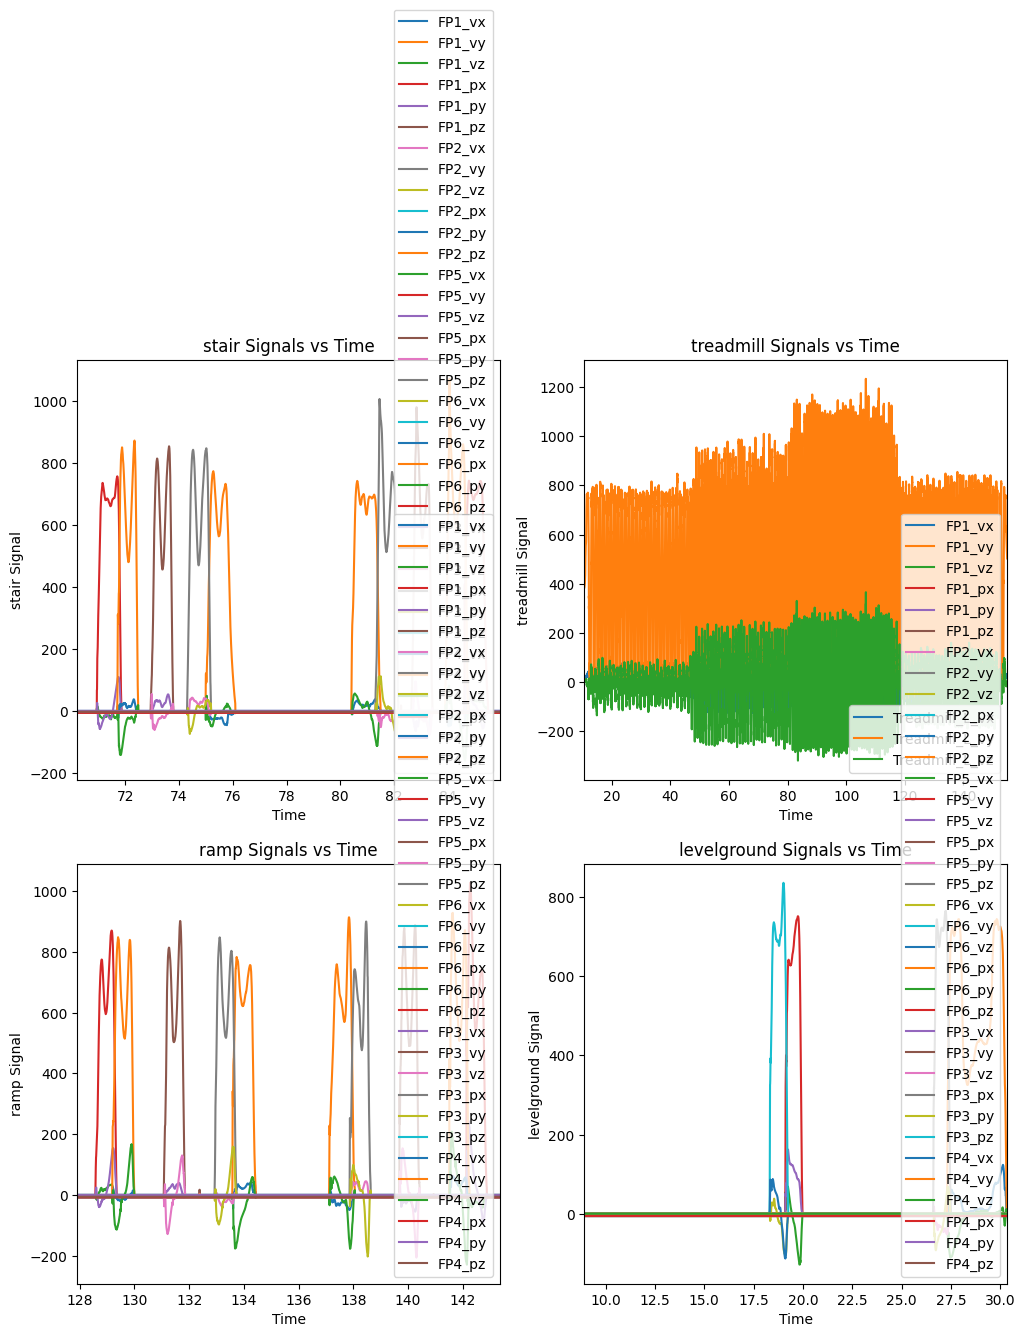

In [5]:
fig, ax = plt.subplots(2, 2, figsize=(12, 12))
# Plot GRFs for all actions
plot_filtered_signals(ax[0,0],grf_data, locomotion='stair', include_columns=['FP.*'], ignore_columns=['.*_moment_.*'],title_prefix='stair')
plot_filtered_signals(ax[0,1],grf_data, locomotion='treadmill', include_columns=['Treadmill_L_v.*'], ignore_columns=[],title_prefix='treadmill')
plot_filtered_signals(ax[1,0],grf_data, locomotion='ramp', include_columns=['FP.*'], ignore_columns=['.*_moment_.*'],title_prefix='ramp')
plot_filtered_signals(ax[1,1],grf_data, locomotion='levelground', include_columns=['FP.*'], ignore_columns=['.*_moment_.*'],title_prefix='levelground')
# plot_filtered_signals(ax[2,0],grf_data,  include_columns=['FP.*'], ignore_columns=['.*_moment_.*'],title_prefix='FP')
# plot_filtered_signals(ax[2,1],grf_data,  include_columns=['Combined_v.*'], title_prefix='Combined')

Average diff: [60.64285714 40.         36.35714286 49.28571429], Std: [4.38515585 0.53452248 0.61028598 0.58901509], min: 35, max: 64
Average diff: [61.28571429 39.92857143 36.35714286 49.35714286], Std: [2.93813769 0.45736602 0.47915742 0.71784826], min: 36, max: 65
(4, 2, 15, 3, 45)


/tmp/ipykernel_124325/3278912787.py:119: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


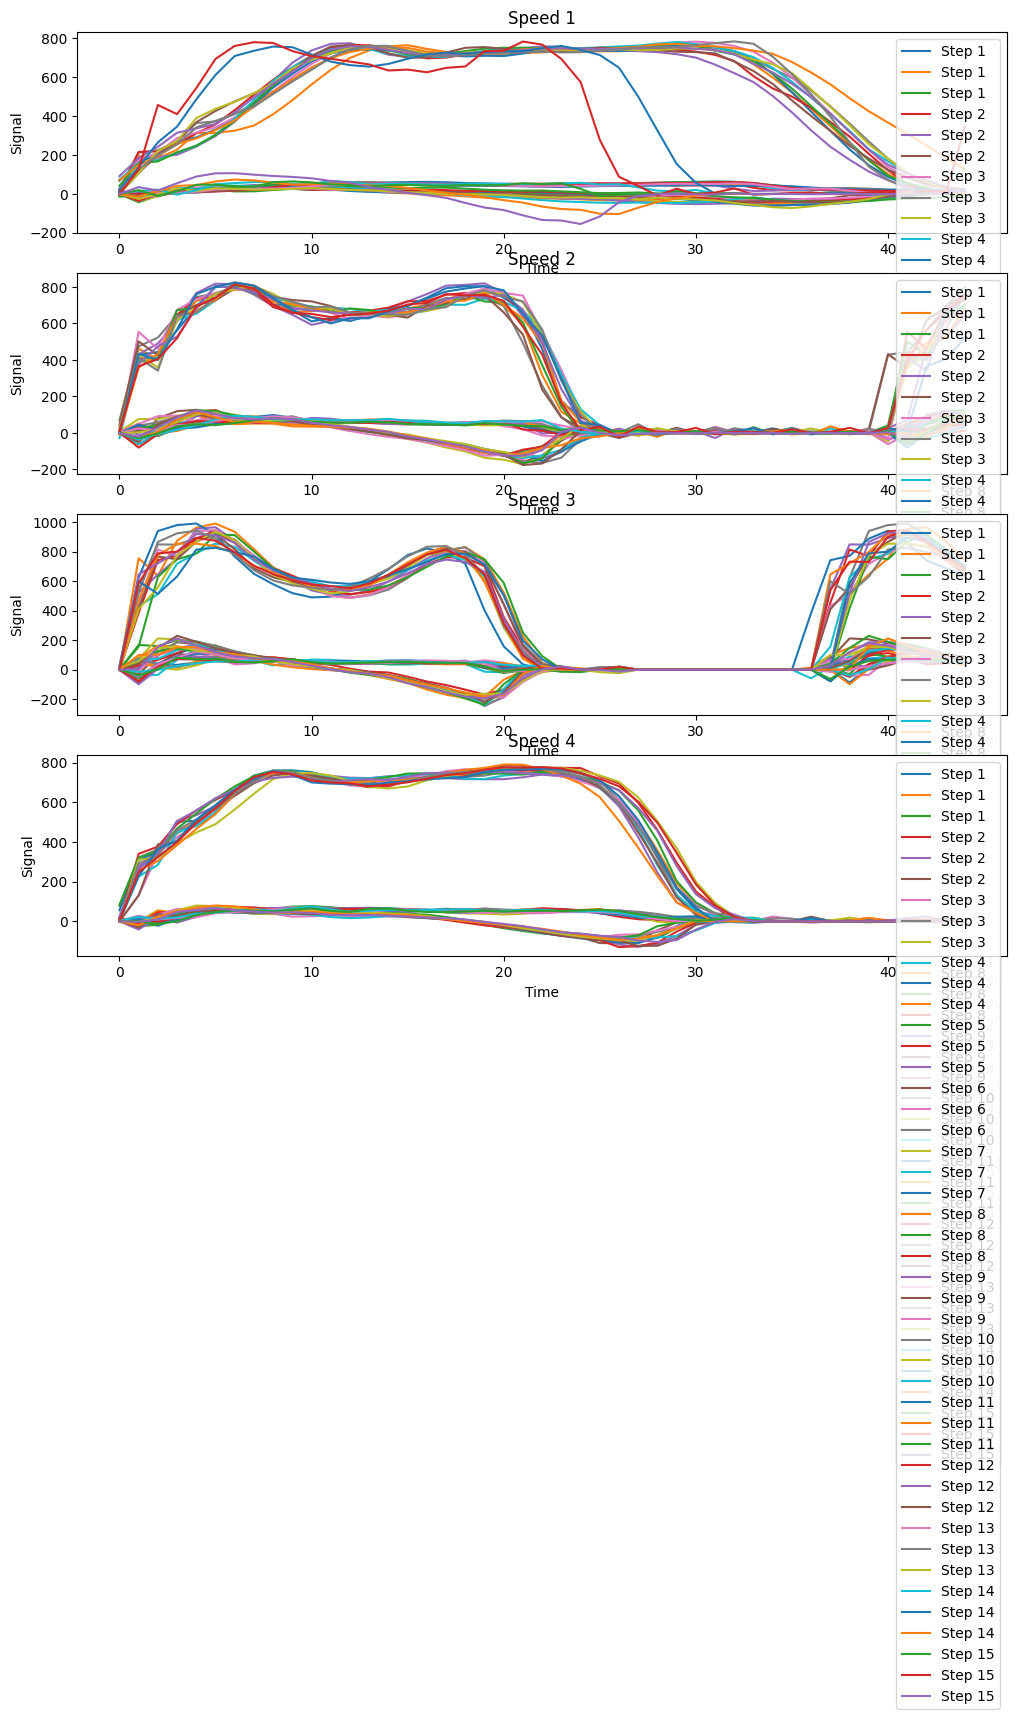

In [9]:
#create a function to get the IMU and GRF data for a specific session for a specific locomotion
def get_data_for_session(imu_data, grf_data, session, locomotion='treadmill', include_imu_columns=['shank_', 'trunk_','_HeelStrike'], include_grf_columns=['Treadmill_L_v','Treadmill_R_v']):
    # print sesssions, if the session is not in the data.
    if session not in imu_data['session'].unique():
        print(f"Session {session} not found in the IMU data. Available sessions: {imu_data['session'].unique()}")
    if session not in grf_data['session'].unique():
        print(f"Session {session} not found in the GRF data. Available sessions: {grf_data['session'].unique()}")

    imu_data_filtered = imu_data[
        (imu_data['session'] == session) | 
        ('gcLeft_session' in imu_data.columns and imu_data['gcLeft_session'] == session) | 
        ('gcRight_session' in imu_data.columns and imu_data['gcRight_session'] == session)
    ]
    imu_data_filtered = imu_data_filtered[imu_data_filtered['locomotion_mode'] == locomotion]
    grf_data_filtered = grf_data[(grf_data['session'] == session)]
    grf_data_filtered = grf_data_filtered[grf_data_filtered['locomotion_mode'] == locomotion]

    # combine the data
    data = pd.merge(imu_data_filtered, grf_data_filtered, left_index=True, right_index=True, suffixes=('_imu', '_grf'))
    # Filter the columns to include only the specified columns
    imu_columns_to_include = [col for col in data.columns if any([pattern in col for pattern in include_imu_columns])]
    grf_columns_to_include = [col for col in data.columns if any([pattern in col for pattern in include_grf_columns])]
    data = data[imu_columns_to_include + grf_columns_to_include]

    return data

# break an array into n segments, take a fixed number of elements from each segment from the middle.
def segment_data(data, n_segments, n_elements):
    segment_size = len(data) // n_segments
    segmented_data = []
    for i in range(n_segments):
        segment = data[i*segment_size:(i+1)*segment_size]
        middle_index = len(segment) // 2
        start_index = max(0, middle_index - n_elements // 2)
        end_index = start_index + n_elements
        segmented_data.append(segment[start_index:end_index])
    return segmented_data
    
from scipy.signal import find_peaks
def step_segmentation(data, window_size=45,
                      n_speeds=4, n_steps=15,
                      indicator_l='gcLeft_HeelStrike', indicator_r='gcRight_HeelStrike', 
                      left_columns=['Treadmill_L_v'], right_columns=['Treadmill_R_v']):
    assert len(left_columns) == len(right_columns)
    segmented_data = np.zeros((n_speeds, 2* len(left_columns), n_steps, 3, window_size))
    
    # Find heel strike events
    heel_strikes_l,_ = find_peaks(data[indicator_l])
    heel_strikes_r,_ = find_peaks(data[indicator_r])


    heel_strikes_l = segment_data(heel_strikes_l, n_speeds, n_steps)
    heel_strikes_r = segment_data(heel_strikes_r, n_speeds, n_steps)

    ldiff = np.diff(heel_strikes_l, axis=1)
    rdiff = np.diff(heel_strikes_r, axis=1)
    print(f"Average diff: {np.mean(ldiff,axis=1)}, Std: {np.std(ldiff,axis=1)}, min: {np.min(ldiff)}, max: {np.max(ldiff)}") 
    print(f"Average diff: {np.mean(rdiff,axis=1)}, Std: {np.std(rdiff,axis=1)}, min: {np.min(rdiff)}, max: {np.max(rdiff)}")

    for speed_idx in range(n_speeds):
        for leg_idx, leg in enumerate(left_columns + right_columns):
            for step_idx in range(n_steps):
                for dim_idx, dim in enumerate(['x', 'y', 'z']):
                    col = f"{leg}{dim}"
                    idx = heel_strikes_l[speed_idx][step_idx]
                    segment = data[col].iloc[idx:idx + window_size].tolist()
                    segmented_data[speed_idx,leg_idx,step_idx,dim_idx] = segment

    # 1 person, 4 speeds, 2 legs, 2 signals, 15 steps, 3 dimentions, time window (35-65)
    
    return segmented_data


# Get the data for a specific session and locomotion
session = 'treadmill_01_01'
data = get_data_for_session(imu_data, grf_data, session)
  

# Segment the data based on heel strikes
segmented_data = step_segmentation(data)

print(segmented_data.shape)

# Plot the segmented data in 4 subplots
fig, axs = plt.subplots(4, 1, figsize=(12, 12))
for i in range(4):
    for j in range(segmented_data.shape[2]):
        axs[i].plot(segmented_data[i, 0, j, :].T, label=f'Step {j+1}')
    axs[i].set_title(f'Speed {i+1}')
    axs[i].set_xlabel('Time')
    axs[i].set_ylabel('Signal')
    axs[i].legend()

plt.tight_layout()
plt.show()



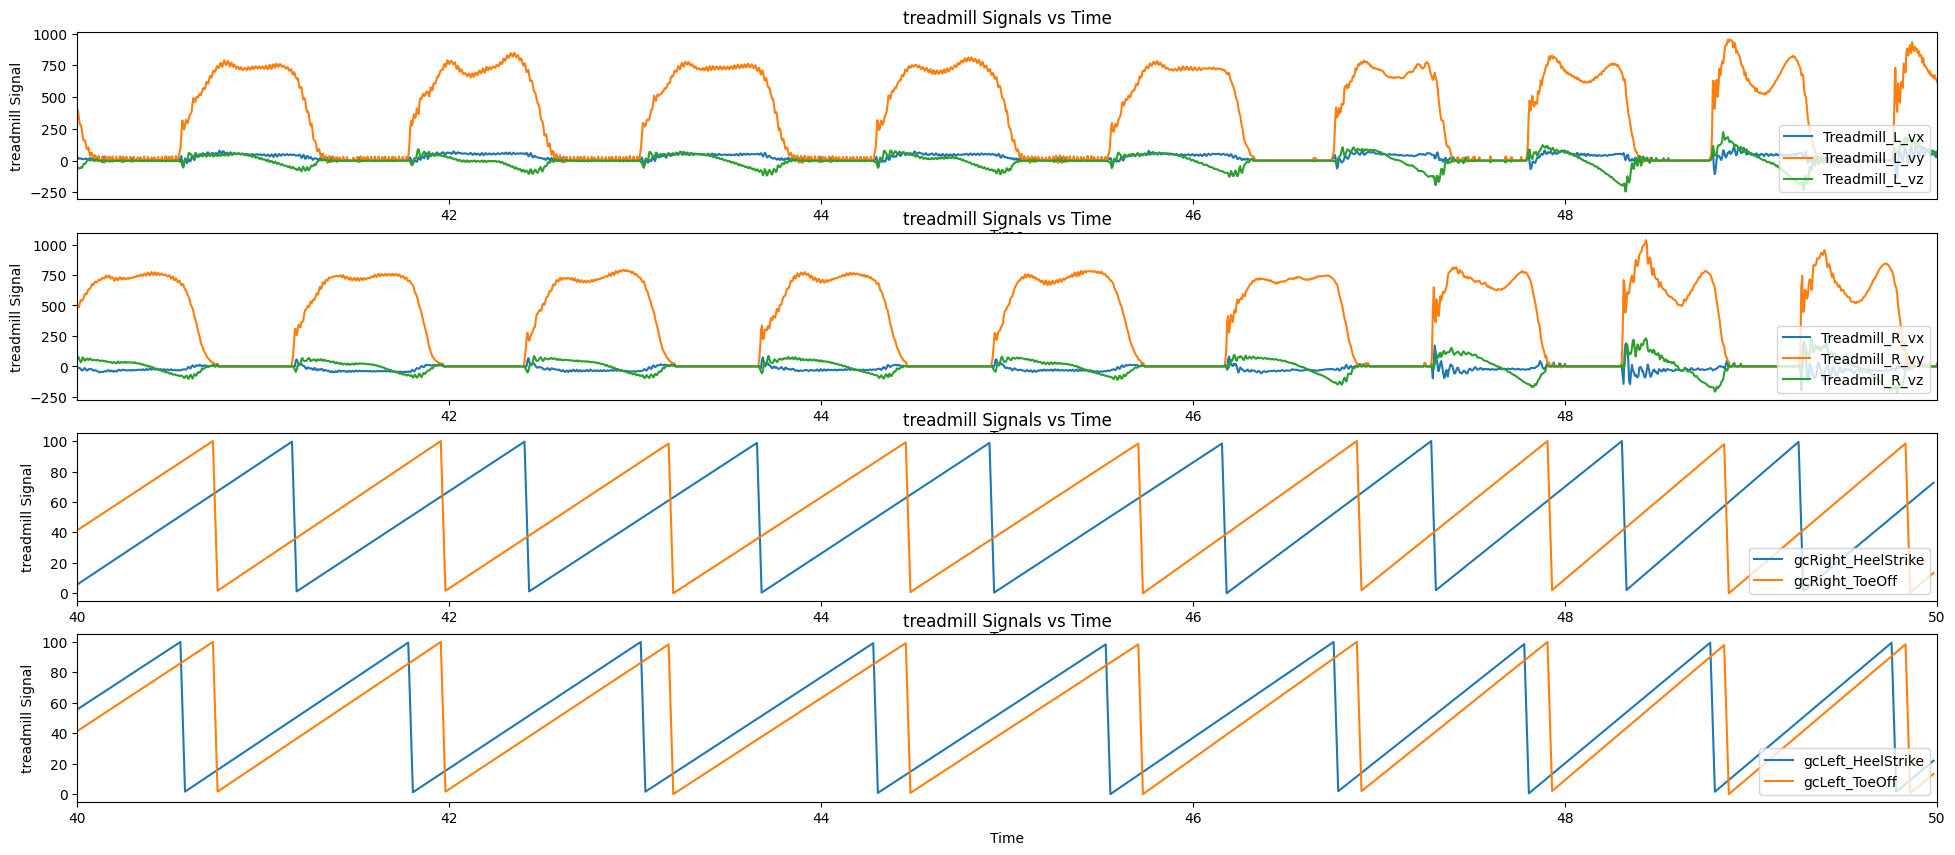

In [7]:
fig, ax = plt.subplots(4, 1, figsize=(24, 10))
plot_filtered_signals(ax[0],grf_data,40,50,locomotion='treadmill', include_columns=['Treadmill_L_v.*'], ignore_columns=[],title_prefix='treadmill')

plot_filtered_signals(ax[1],grf_data, 40,50,locomotion='treadmill', include_columns=['Treadmill_R_v.*'], ignore_columns=[],title_prefix='treadmill')

plot_filtered_signals(ax[2],imu_data, 40,50,locomotion='treadmill', include_columns=['gcRight_.*'],title_prefix='treadmill')

plot_filtered_signals(ax[3],imu_data, 40,50,locomotion='treadmill', include_columns=['gcLeft_.*'],title_prefix='treadmill')
